## Observations and Insights

## Dependencies and starter code

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="left")
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

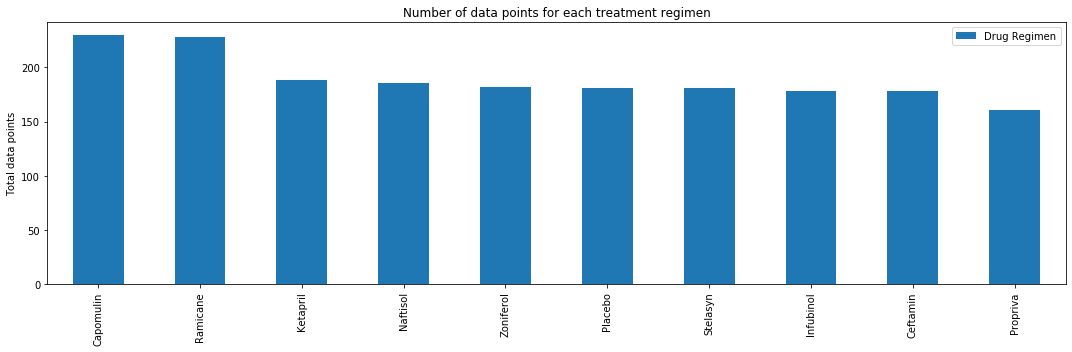

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = combined_df["Drug Regimen"].value_counts()
regimen_count.plot(kind="bar",figsize=(15,5))
plt.ylabel("Total data points")
plt.title("Number of data points for each treatment regimen")
plt.legend()
plt.tight_layout()
plt.show()

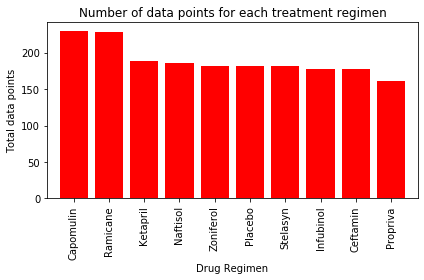

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_count = combined_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_count))

plt.bar(x_axis, regimen_count, color = "r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,regimen_count.index.values, rotation="vertical")
plt.title("Number of data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total data points")
plt.xlim(-0.75, len(x_axis)-.25)
plt.tight_layout()
plt.show()

## Pie plots

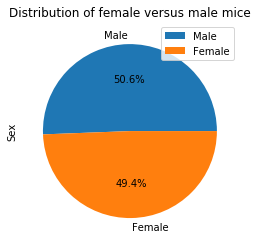

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pd.DataFrame(combined_df["Sex"].value_counts())
mice_gender.plot(kind="pie",y="Sex",title="Distribution of female versus male mice", autopct="%1.1f%%")
plt.show()

/Users/jasmineshin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


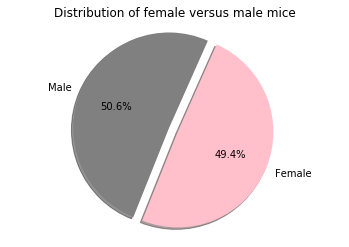

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1,0)
colors = ["grey", "pink"]
plt.pie(mice_gender, labels=["Male","Female"],explode=explode, colors=colors, autopct="%1.1f%%",shadow=True, startangle=66)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()


## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [70]:
summary_df["Mean"].sort_values(ascending=False)

Drug Regimen
Ketapril     55.235638
Naftisol     54.331565
Stelasyn     54.233149
Placebo      54.033581
Zoniferol    53.236507
Infubinol    52.884795
Ceftamin     52.591172
Propriva     52.322552
Capomulin    40.675741
Ramicane     40.216745
Name: Mean, dtype: float64

In [71]:
regimen_sort = combined_df.sort_values(["Drug Regimen", "Timepoint"], ascending=False)
max_point = regimen_sort.loc[regimen_sort["Timepoint"] == 45]
max_point.head().reset_index()
ket_data_df = max_point[max_point["Drug Regimen"].isin(["Ketapril"])]
ket_list = ket_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ket_list = ket_list["Tumor Volume (mm3)"]
ket_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [72]:
regimen_sort = combined_df.sort_values(["Drug Regimen", "Timepoint"], ascending=False)
max_point = regimen_sort.loc[regimen_sort["Timepoint"] == 45]
max_point.head().reset_index()
naf_data_df = max_point[max_point["Drug Regimen"].isin(["Ketapril"])]
naf_list = naf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
naf_list = naf_list["Tumor Volume (mm3)"]
naf_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [73]:
regimen_sort = combined_df.sort_values(["Drug Regimen", "Timepoint"], ascending=False)
max_point = regimen_sort.loc[regimen_sort["Timepoint"] == 45]
max_point.head().reset_index()
ste_data_df = max_point[max_point["Drug Regimen"].isin(["Ketapril"])]
ste_list = ste_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ste_list = ste_list["Tumor Volume (mm3)"]
ste_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [74]:
regimen_sort = combined_df.sort_values(["Drug Regimen", "Timepoint"], ascending=False)
max_point = regimen_sort.loc[regimen_sort["Timepoint"] == 45]
max_point.head().reset_index()
pla_data_df = max_point[max_point["Drug Regimen"].isin(["Ketapril"])]
pla_list = pla_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
pla_list = pla_list["Tumor Volume (mm3)"]
pla_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [75]:
quartiles = ket_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 67.12916566999999
The upper quartile of temperatures is: 74.002742395
The interquartile range of temperatures is: 6.873576725000007
The the median of temperatures is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


In [76]:
quartiles = naf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 67.12916566999999
The upper quartile of temperatures is: 74.002742395
The interquartile range of temperatures is: 6.873576725000007
The the median of temperatures is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


In [77]:
quartiles = ste_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 67.12916566999999
The upper quartile of temperatures is: 74.002742395
The interquartile range of temperatures is: 6.873576725000007
The the median of temperatures is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


In [78]:
quartiles = pla_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 67.12916566999999
The upper quartile of temperatures is: 74.002742395
The interquartile range of temperatures is: 6.873576725000007
The the median of temperatures is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


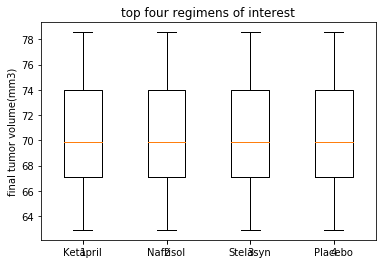

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("top four regimens of interest")
ax1.set_ylabel("final tumor volume(mm3)")
plt.xticks([1, 2, 3, 4],["Ketapril", "Naftisol", "Stelasyn","Placebo"])
ax1.boxplot([ket_list,naf_list,ste_list,pla_list])
plt.show()

## Line and scatter plots

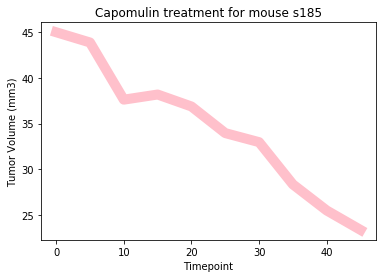

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_values_plot = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]["Timepoint"][combined_df["Mouse ID"]=="s185"]
y_values_plot = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"][combined_df["Mouse ID"]=="s185"]

plt.plot(x_values_plot,y_values_plot, linewidth=10,color="pink")
plt.title("Capomulin treatment for mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [12]:
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [45]:
avg_cap = pd.DataFrame(capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


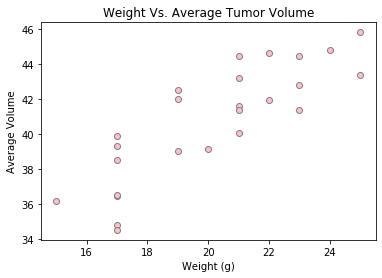

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(avg_cap["Weight (g)"], avg_cap["Average Volume"], marker="o", facecolors="pink", edgecolors="grey")
plt.xlabel("Weight (g)")
plt.ylabel("Average Volume")
plt.title("Weight Vs. Average Tumor Volume")

plt.show()

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_cap.iloc[:,1]
avg_tumor_volume = avg_cap.iloc[:,2]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


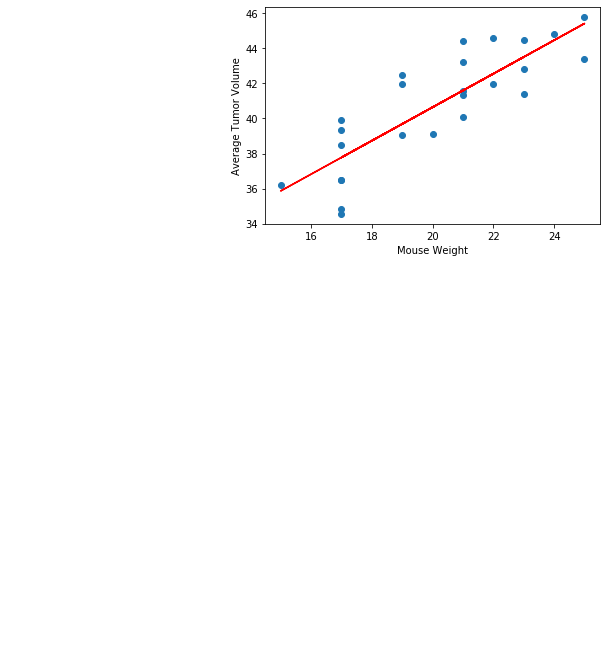

In [63]:
x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()